### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,f1_score

### IMPORTING DATASET

In [2]:
data = pd.read_csv("drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### DATA PREPROCESSING

In [3]:
data.isnull().any().sum()

0

In [4]:
data.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [5]:
data.shape

(200, 6)

In [6]:
data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [21]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### DATA VISUALIZATION

In [7]:
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)

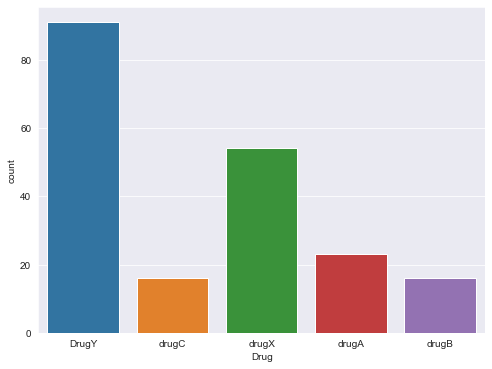

In [8]:
sns.countplot(x='Drug',data=data)

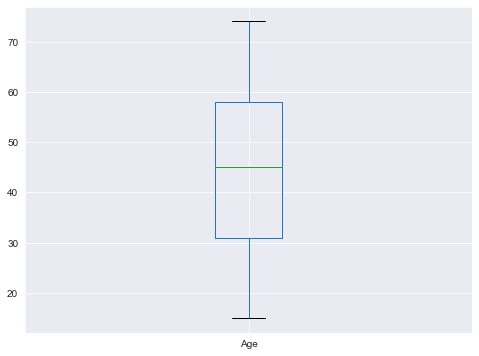

In [9]:
# finding outliers
data['Age'].plot(kind='box')

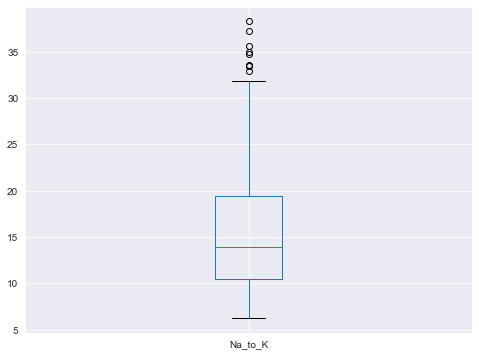

In [10]:
data['Na_to_K'].plot(kind='box')

In [11]:
value = stats.zscore(data['Na_to_K'],axis=0)
value

# z score formula

#data_mean=data['Na_to_K'].mean()
#print(data_mean)
#data_std=data['Na_to_K'].std()
# print(data_std)
# zscore = observed value - mean / standard deviation
# 1.28 --> (25.33-16.08)/7.22

array([ 1.28652212, -0.4151454 , -0.82855818, -1.14996267,  0.27179427,
       -1.03769314,  0.02643885, -0.70046821, -0.12676951,  0.45567206,
       -0.59916196,  0.43221897, -0.09832049,  0.674105  , -0.46926791,
       -0.0788919 , -0.64245998, -0.29316156, -1.21935052,  1.37242427,
        0.42236589,  1.36451406,  2.00995979, -0.14550423,  2.41490725,
        0.37809645,  1.9819271 , -0.93028076,  0.91765633,  0.25902691,
       -1.01784822, -0.90446848, -0.70366006,  2.19147839, -0.27081868,
       -1.2211546 , -0.92139911, -0.29787994, -0.88476233, -0.97149714,
        0.43527203, -0.25610845, -0.04086736, -0.53074555, -0.5258884 ,
       -1.10708099, -0.41542295, -0.80399488,  2.16511101,  0.51506806,
        0.46233329, -0.71975804,  1.54020408,  0.32924741, -0.81815   ,
       -0.26707173, -0.65841918,  1.62943685, -0.83175002,  0.36338623,
        1.91378824, -0.91723584,  0.63954985, -1.07058298, -0.3860025 ,
        1.52174691, -0.44803523, -0.72891723,  1.18979546,  1.13

In [12]:
IQR1=np.quantile(data['Na_to_K'],0.25)
IQR3=np.quantile(data['Na_to_K'],0.75)
IQR = IQR3-IQR1
print(IQR)
print(IQR1)
print(IQR3)

8.934499999999998
10.445500000000001
19.38


In [13]:
data_outlier=data[data['Na_to_K']>(IQR3+1.5*IQR)]
data_outlier

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
24,33,F,LOW,HIGH,33.486,DrugY
96,58,F,LOW,HIGH,38.247,DrugY
98,20,M,HIGH,NORMAL,35.639,DrugY
128,47,M,LOW,NORMAL,33.542,DrugY
131,52,M,LOW,NORMAL,32.922,DrugY
184,18,F,HIGH,HIGH,37.188,DrugY
188,65,M,HIGH,NORMAL,34.997,DrugY
194,46,F,HIGH,HIGH,34.686,DrugY


In [14]:
data.shape

(200, 6)

In [22]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [15]:
# remove outliers
data.drop(data_outlier.index.tolist(),axis=0,inplace=True)
data.shape

(192, 6)

In [16]:
X=data.drop('Drug',axis=1)
y=data['Drug']

In [23]:
# converting all categorical values into numerical 
categorical_features=X.select_dtypes('object').columns.tolist()

for i in categorical_features:
    X[i]=LabelEncoder().fit_transform(X[i])

In [24]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [25]:
X_norm=StandardScaler().fit_transform(X)
X_norm[0:5]

array([[-1.29547962, -1.04257207, -1.12245329, -0.96922337,  1.62622686],
       [ 0.15767766,  0.9591663 ,  0.08828284, -0.96922337, -0.3554977 ],
       [ 0.15767766,  0.9591663 ,  0.08828284, -0.96922337, -0.83694914],
       [-0.99273852, -1.04257207,  1.29901897, -0.96922337, -1.21124975],
       [ 1.00535274, -1.04257207,  0.08828284, -0.96922337,  0.44449713]])

### SPLITTING DATA

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((134, 5), (134,), (58, 5), (58,))

### RANDOM FOREST CLASSIFIER

In [27]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
yhat=rfc.predict(X_test)

In [28]:
print('Accuracy Score:',accuracy_score(y_test,yhat))

Accuracy Score: 0.9827586206896551


In [29]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       0.92      1.00      0.96        12
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        20

    accuracy                           0.98        58
   macro avg       0.98      0.96      0.97        58
weighted avg       0.98      0.98      0.98        58



In [30]:
f1_score(y_test,yhat,average='weighted')

0.9821455938697319

In [31]:
cm = confusion_matrix(y_test, yhat)
cm

array([[19,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 20]], dtype=int64)